<a href="https://colab.research.google.com/github/yosyos1998/image_denoising/blob/main/Image_denoising_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Librairies and Dataset**

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [15]:
#Load dataset
(x_train , y_train) ,(x_test , y_test) = tf.keras.datasets.fashion_mnist.load_data()

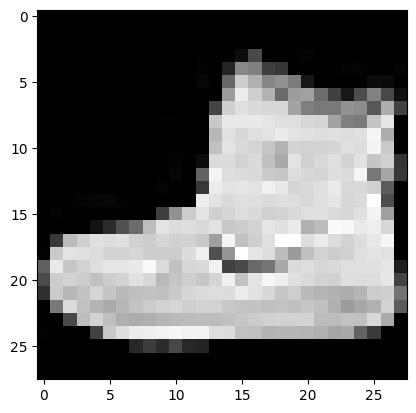

In [12]:
#visualize a sample image
plt.imshow(x_train[0] , cmap='gray')

In [13]:
#check out the shape of training data
x_train.shape

(60000, 28, 28)

In [19]:
#check out the shape of testing datax_test.shape
x_test.shape

(10000, 28, 28)

In [20]:
y_train.shape

(60000,)

In [21]:
y_test.shape

(10000,)

**Perform Data Visualization**


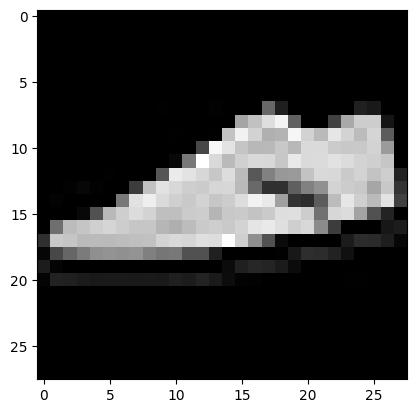

In [35]:
#Let's view someimages
i = random.randint(1,6000)
plt.imshow(x_train[i] , cmap = 'gray')

In [36]:
label = y_train[i]
label

7

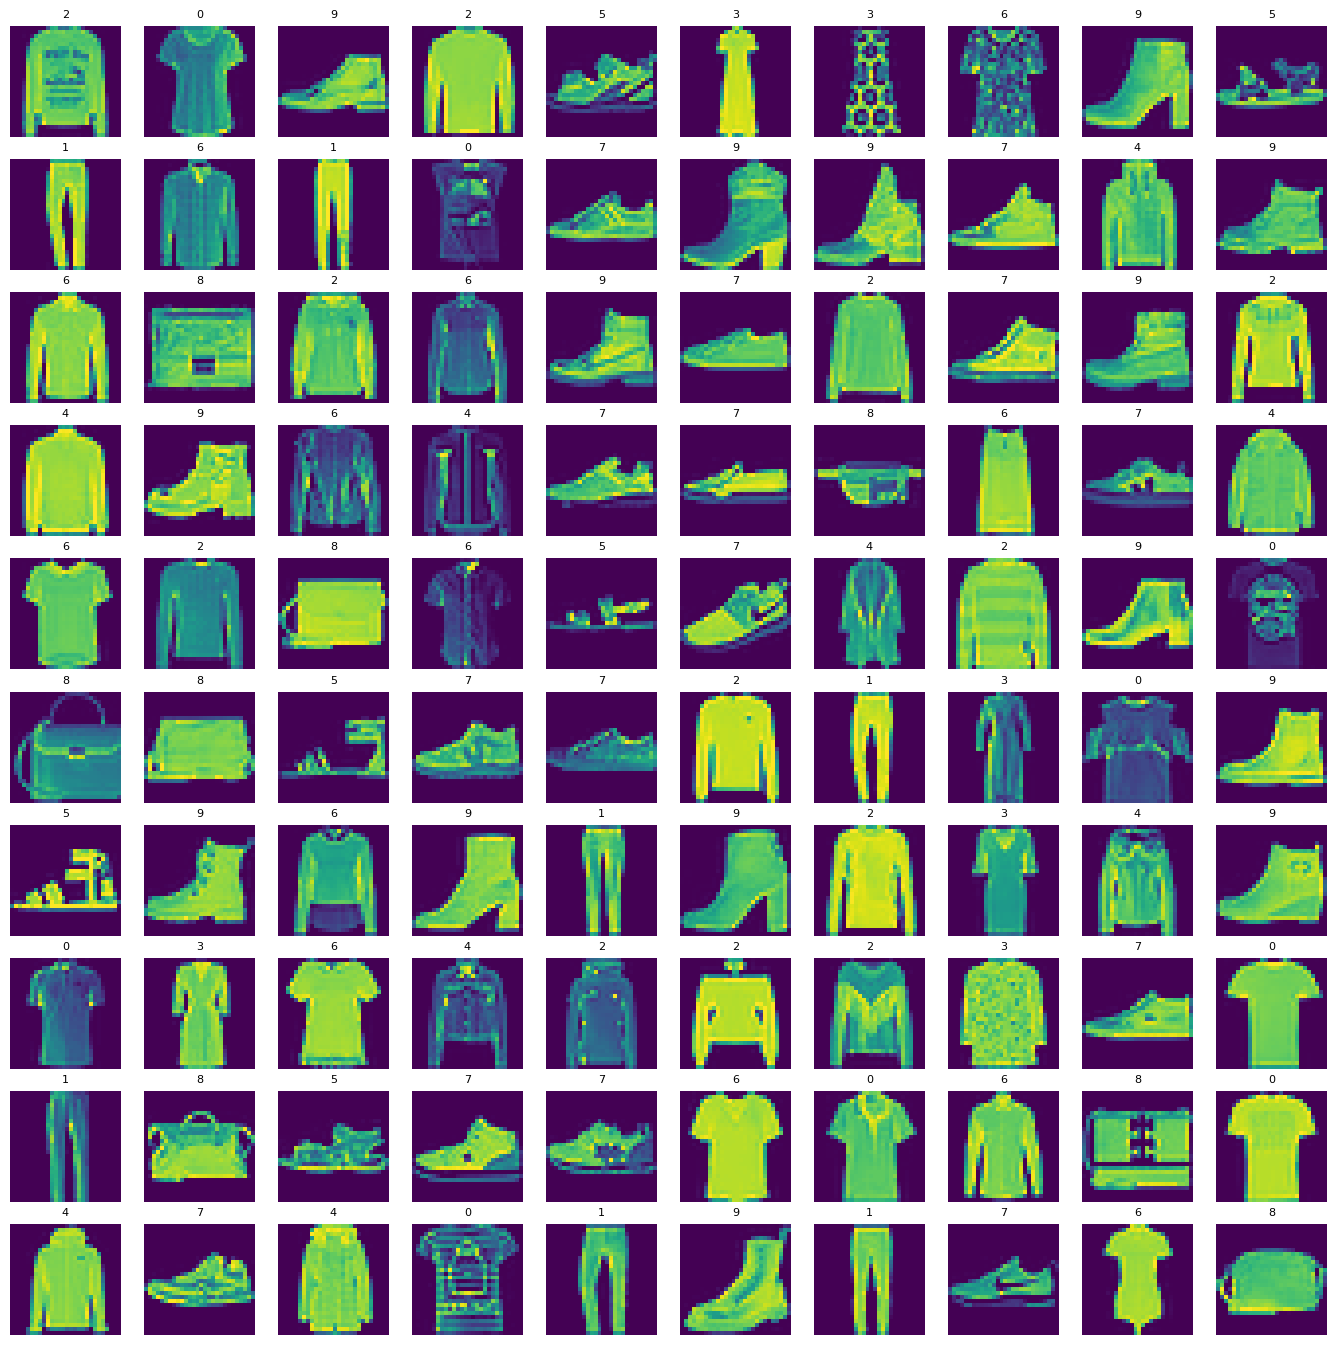

In [46]:
#Let's view more images in a grid format
#Define the dimensions of the plot grid
w_grid = 10
L_grid =10
fig , axes  = plt.subplots(L_grid , w_grid ,figsize =(17,17))
axes = axes.ravel()
n_training = len(x_train)

#select a random number from 0 to n_training
for i in np.arange(0 , w_grid *L_grid):
  index = np.random.randint(0,n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index] , fontsize = 8)
  axes[i].axis('off')


**Perform Data Preprocessing**

In [47]:
#normalize data
x_train = x_train/255
x_test = x_test/255




In [48]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [49]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [50]:
#add some noise

noise_factor = 0.3
noise_dataset = []
for img in x_train :
  noisy_image = img + noise_factor*np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image , 0 , 1)
  noise_dataset.append(noisy_image)

In [69]:
noise_dataset = np.array(noise_dataset)

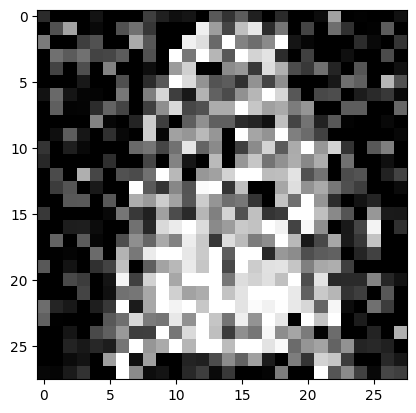

In [51]:
plt.imshow(noise_dataset[22], cmap ='gray')

In [52]:
#add noise to testing data as well
noise_factor = 0.3
noise_test_dataset = []
for img in x_test :
  noisy_image = img + noise_factor*np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image , 0 , 1)
  noise_test_dataset.append(noisy_image)

In [71]:
noise_test_dataset = np.array(noise_test_dataset)

**build and train autoencoder deep learning model**

In [59]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16 , kernel_size = 3 , strides =2 , padding = "same" ,input_shape = (28,28,1)) )
autoencoder.add(tf.keras.layers.Conv2D(filters = 8 , kernel_size = 3 , strides =2 , padding = "same" ) )
autoencoder.add(tf.keras.layers.Conv2D(filters = 8 , kernel_size = 3 , strides = 1, padding = "same" ) )

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3 , strides =2 , padding = "same" ) )
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3 , strides =2 ,activation='sigmoid', padding = "same" ) )

In [74]:
autoencoder.compile(loss ='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 16)        1168      
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 1)         145       
 Transpose)                                                      
                                                                 
Total params: 3217 (12.57 KB)
Trainable params: 3217 (

In [75]:
autoencoder.fit(noise_dataset.reshape(-1,28,28,1),
                x_train.reshape(-1,28,28,1),
                epochs =10 ,
                batch_size = 200,
                validation_data =( noise_test_dataset.reshape(-1,28,28,1) , x_test.reshape(-1,28,28,1)))

Epoch 1/10
300/300 [==============================] - 16s 49ms/step - loss: 0.3962 - val_loss: 0.3240
Epoch 2/10
300/300 [==============================] - 15s 49ms/step - loss: 0.3144 - val_loss: 0.3123
Epoch 3/10
300/300 [==============================] - 16s 52ms/step - loss: 0.3079 - val_loss: 0.3086
Epoch 4/10
300/300 [==============================] - 15s 49ms/step - loss: 0.3051 - val_loss: 0.3066
Epoch 5/10
300/300 [==============================] - 17s 55ms/step - loss: 0.3035 - val_loss: 0.3051
Epoch 6/10
300/300 [==============================] - 15s 49ms/step - loss: 0.3022 - val_loss: 0.3040
Epoch 7/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3014 - val_loss: 0.3033
Epoch 8/10
300/300 [==============================] - 16s 52ms/step - loss: 0.3008 - val_loss: 0.3028
Epoch 9/10
300/300 [==============================] - 15s 49ms/step - loss: 0.3004 - val_loss: 0.3025
Epoch 10/10
300/300 [==============================] - 15s 51ms/step - loss: 0.300

**Evaluate the Trained Model**

In [78]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1,28,28,1),x_test.reshape(-1,28,28,1))
print('Test Accuracy :{:.3f}' .format(evaluation) )

313/313 [==============================] - 2s 7ms/step - loss: 0.3021
Test Accuracy :0.302


In [80]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1,28,28,1))

1/1 [==============================] - 0s 135ms/step


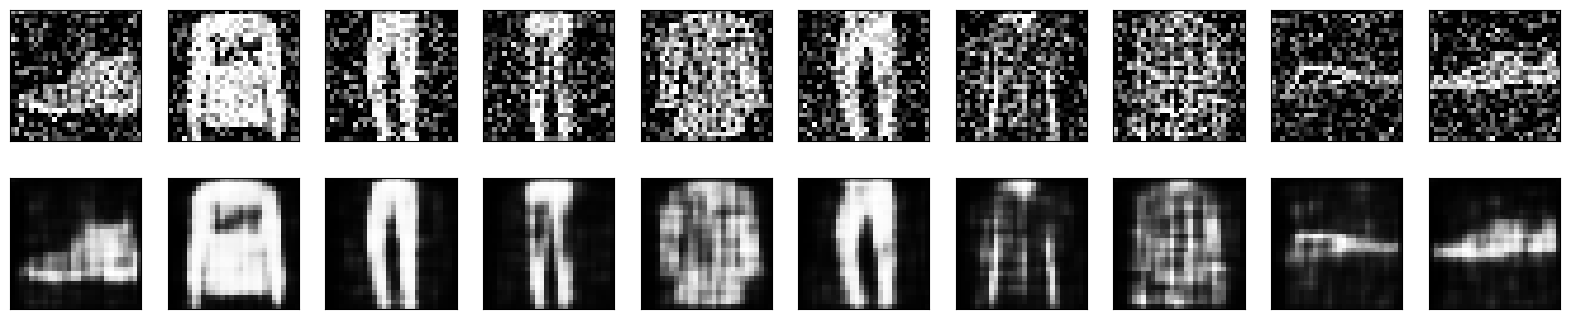

In [82]:
fig , axes = plt.subplots(nrows = 2, ncols =10 , sharex =True , sharey = True , figsize=(20,4))
for images ,row in zip ([noise_test_dataset[:10],predicted],axes) :
  for img , ax in zip (images , row):
    ax.imshow(img.reshape((28,28)), cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)